# analysis lsst opsim database using maf & pandas 

In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.plots as plots

# open database use OpsimDatabase
opsdb = db.OpsimDatabase('baseline2018a.db')

# output
outDir = 'outdir'
resultsDb = db.ResultsDb(outDir=outDir)

## get some data by maf

In [3]:
class getDataMetric(metrics.BaseMetric):
    """
    extract data from database by column names, 
    combined with UniSlicer()
    """
    
    def __init__(self, colname=['expMJD', 'airmass'], **kwargs):
        self.colname = colname
        super().__init__(col=colname, metricDtype='object', **kwargs)
        
        
    def run(self, dataSlice, slicePoint=None):
        
        # return dataSlice directly
        result = dataSlice
        
        return result
   

In [72]:
metric = getDataMetric(colname=['night', 'observationStartMJD', 'fieldId', 'fiveSigmaDepth', 'filter'])
slicer = slicers.UniSlicer()
#slicer = slicers.HealpixSlicer(nside=16)
sqlconstraint = 'night<20'

# bundle
Sky = metricBundles.MetricBundle(metric, slicer, sqlconstraint)

# group bundle
bundleDict = {'Sky':Sky}
group = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir = outDir, resultsDb=resultsDb)

# run
group.runAll()
group.plotAll(closefigs = False)


Querying database SummaryAllProps with constraint night<20 for columns ['fiveSigmaDepth', 'fieldRA', 'filter', 'night', 'fieldDec', 'observationStartMJD']
Found 15051 visits
Running:  ['Sky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night<20" constraint now.
Plotting complete.


/home/docmaf/repos/sims_maf/python/lsst/sims/maf/db/resultsDb.py:290: UserWarning: Warning! Cannot save non-conforming summary statistic.
  warnings.warn('Warning! Cannot save non-conforming summary statistic.')


In [73]:
data = Sky.metricValues.data

# create DataFrame from ndarrays
dataframe = pd.DataFrame(data[0])

dataframe.head(10)

,fiveSigmaDepth,fieldRA,filter,night,fieldDec,observationStartMJD,fieldId
0,23.348592,305.088793,z,1,-24.889283,59853.016794,1545.0
1,22.545454,302.892080,z,1,29.966322,59853.017801,3968.0
2,23.167857,305.482200,z,1,-62.802603,59853.019826,300.0
3,23.201599,307.103419,z,1,-60.072224,59853.020278,356.0
4,23.231315,308.429608,z,1,-57.316612,59853.020729,421.0
5,23.257295,309.524342,z,1,-54.543202,59853.021181,491.0
6,23.280534,310.436948,z,1,-51.758333,59853.021620,562.0
7,23.300256,311.207033,z,1,-48.966530,59853.022072,650.0
8,22.859744,344.225787,z,1,3.595779,59853.023646,2811.0
9,23.338533,310.040870,z,1,-26.923727,59853.024595,1444.0


## pratice pandas 

In [74]:
# get columns index
dataframe.columns

Index(['fiveSigmaDepth', 'fieldRA', 'filter', 'night', 'fieldDec',
       'observationStartMJD', 'fieldId'],
      dtype='object')

In [41]:
# select columns
dataframe['filter']

0        z
1        z
2        z
3        z
4        z
5        z
6        z
7        z
8        z
9        z
10       z
11       z
12       z
13       z
14       z
15       z
16       z
17       z
18       z
19       z
20       z
21       z
22       z
23       z
24       z
25       z
26       z
27       z
28       z
29       z
        ..
15021    y
15022    y
15023    y
15024    y
15025    y
15026    y
15027    y
15028    y
15029    y
15030    y
15031    y
15032    y
15033    y
15034    y
15035    y
15036    y
15037    y
15038    y
15039    y
15040    y
15041    y
15042    y
15043    y
15044    y
15045    y
15046    y
15047    y
15048    y
15049    y
15050    y
Name: filter, Length: 15051, dtype: object

In [38]:
# select row
dataframe.loc[5:10]

,skyBrightness,fieldRA,filter,night,fieldDec,observationStartMJD,fieldId
5,19.313657,309.524342,z,1,-54.543202,59853.021181,491.0
6,19.332291,310.436948,z,1,-51.758333,59853.021620,562.0
7,19.347677,311.207033,z,1,-48.966530,59853.022072,650.0
8,18.994195,344.225787,z,1,3.595779,59853.023646,2811.0
9,19.362056,310.040870,z,1,-26.923727,59853.024595,1444.0
10,19.357886,311.140148,z,1,-23.881413,59853.025058,1569.0


In [56]:
# sort by
dataframe.sort_values(by=['fieldRA', 'fieldDec'])

,skyBrightness,fieldRA,filter,night,fieldDec,observationStartMJD,fieldId
11349,17.571001,0.000000,y,15,-90.000000,59867.140208,1.0
12069,17.570965,0.000000,y,16,-90.000000,59868.105440,1.0
12936,17.570907,0.000000,y,17,-90.000000,59869.133333,1.0
11348,17.691049,0.000000,y,15,-85.272892,59867.139745,9.0
12068,17.689965,0.000000,y,16,-85.272892,59868.104988,9.0
12934,17.691085,0.000000,y,17,-85.272892,59869.132431,9.0
11346,17.794894,0.000000,y,15,-80.515486,59867.138854,34.0
12067,17.792739,0.000000,y,16,-80.515486,59868.104525,34.0
12933,17.794995,0.000000,y,17,-80.515486,59869.131968,34.0
11344,17.884361,0.000000,y,15,-75.741971,59867.137963,79.0


In [75]:
# change the order of column
colorder = ['observationStartMJD', 'night', 'fieldId', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'filter']

dataframe = dataframe[colorder]

In [76]:
dataframe.head(10)

,observationStartMJD,night,fieldId,fieldRA,fieldDec,fiveSigmaDepth,filter
0,59853.016794,1,1545.0,305.088793,-24.889283,23.348592,z
1,59853.017801,1,3968.0,302.892080,29.966322,22.545454,z
2,59853.019826,1,300.0,305.482200,-62.802603,23.167857,z
3,59853.020278,1,356.0,307.103419,-60.072224,23.201599,z
4,59853.020729,1,421.0,308.429608,-57.316612,23.231315,z
5,59853.021181,1,491.0,309.524342,-54.543202,23.257295,z
6,59853.021620,1,562.0,310.436948,-51.758333,23.280534,z
7,59853.022072,1,650.0,311.207033,-48.966530,23.300256,z
8,59853.023646,1,2811.0,344.225787,3.595779,22.859744,z
9,59853.024595,1,1444.0,310.040870,-26.923727,23.338533,z


In [95]:
# get data of a filter
df_r = dataframe.loc[np.where(dataframe['filter']=='r')]
df_r.head(5)

,observationStartMJD,night,fieldId,fieldRA,fieldDec,fiveSigmaDepth,filter
165,59853.106065,1,290.0,349.386443,-63.321004,24.096762,r
166,59853.106481,1,290.0,349.386443,-63.321004,24.097472,r
167,59853.106898,1,290.0,349.386443,-63.321004,24.098181,r
168,59853.107315,1,290.0,349.386443,-63.321004,24.098891,r
169,59853.107731,1,290.0,349.386443,-63.321004,24.099600,r


In [78]:
# count the nunmber of observation of a field in 'r' band
uni, nbs = np.unique(dataframe['fieldId'], return_counts=True)

uni, nbs

(array([1.000e+00, 3.000e+00, 4.000e+00, ..., 4.085e+03, 4.181e+03,
        4.203e+03]), array([3, 3, 3, ..., 8, 5, 3]))

In [94]:
df_r.sort_values(['fieldId', 'observationStartMJD']).head(5)

,observationStartMJD,night,fieldId,fieldRA,fieldDec,fiveSigmaDepth,filter
165,59853.106065,1,290.0,349.386443,-63.321004,24.096762,r
166,59853.106481,1,290.0,349.386443,-63.321004,24.097472,r
167,59853.106898,1,290.0,349.386443,-63.321004,24.098181,r
168,59853.107315,1,290.0,349.386443,-63.321004,24.098891,r
169,59853.107731,1,290.0,349.386443,-63.321004,24.099600,r


In [81]:
# get dataframe for a field
df_field290 = df_r.loc[df_r['fieldId']==290.0]

df_field290

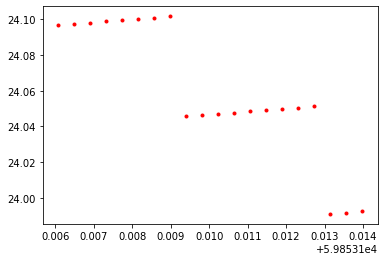

In [92]:
# plot the light curve of a field
time = df_field290['observationStartMJD']
mag = df_field290['fiveSigmaDepth']

plt.plot(time[0:20], mag[0:20], 'r.')


## load data from file, txt, csv, json

In [104]:
# csv 
df_field290.to_csv('df_test.csv')

df = pd.read_csv('df_test.csv')

In [109]:
# hdf5
# requires pytables
df.to_hdf('df_test.h5', 'df')

df = pd.read_hdf('df_test.h5', 'df')

In [111]:
# json
df = pd.read_json('tdelc.json')


In [113]:
df['PTF09ge']

photometry    [[54910.453, 22.0011, , True, g, PTF 48-Inch, ...
Name: PTF09ge, dtype: object